In [1]:
# ---- Reproducibility
import random
import torch

#seed = 1234
#random.seed(seed)
#torch.manual_seed(seed)
#if torch.cuda.is_available():
#    torch.cuda.manual_seed_all(seed)


In [2]:


# ---- Parameters
n, p = 50, 40
noise_std = 0.1

# (Optional) choose device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ---- Data generation (PyTorch)
# Use float64 to mirror NumPy defaults
u = torch.rand(n, dtype=torch.float64, device=device)          # length n
v = torch.rand(p, dtype=torch.float64, device=device)          # length p

# Rank-1 matrix via outer product
rank_1_matrix = torch.outer(u, v)                              # (n, p)

# Homoscedastic Gaussian noise
noise = noise_std * torch.randn(n, p, dtype=torch.float64, device=device)

noisy_matrix = rank_1_matrix + noise

# ---- Print (move to CPU for readability if needed)
print("Rank-1 Matrix (Outer Product):")
print(rank_1_matrix.cpu().numpy())

print("\nNoisy Matrix (with Homoscedastic Noise):")
print(noisy_matrix.cpu().numpy())


Rank-1 Matrix (Outer Product):
[[3.31670169e-02 3.95382816e-02 2.67587242e-01 ... 2.25543404e-01
  9.94035512e-02 3.62524648e-01]
 [4.20217780e-02 5.00940104e-02 3.39026320e-01 ... 2.85757832e-01
  1.25941805e-01 4.59309630e-01]
 [5.81278559e-02 6.92940081e-02 4.68968093e-01 ... 3.95282897e-01
  1.74212692e-01 6.35353508e-01]
 ...
 [2.29864321e-05 2.74020430e-05 1.85451588e-04 ... 1.56313067e-04
  6.88917241e-05 2.51248046e-04]
 [1.67608225e-02 1.99805162e-02 1.35224168e-01 ... 1.13977479e-01
  5.02331966e-02 1.83200416e-01]
 [3.92921011e-02 4.68399724e-02 3.17003637e-01 ... 2.67195397e-01
  1.17760798e-01 4.29473509e-01]]

Noisy Matrix (with Homoscedastic Noise):
[[ 0.03909983 -0.00415759  0.3262608  ...  0.06812778  0.19552357
   0.40332182]
 [-0.09849169  0.19566019  0.23663036 ...  0.26119258  0.09808878
   0.37284217]
 [ 0.12197242  0.11011738  0.73959495 ...  0.31310695  0.15432062
   0.64992384]
 ...
 [-0.11398092  0.11918025  0.02447941 ... -0.11671451 -0.19732228
  -0.04187714

In [3]:
import sys
import os
import matplotlib.pyplot as plt
from cebmf_torch import cEBMF

In [4]:
mycebmf=  cEBMF(data= noisy_matrix, prior_F="exp",
                prior_L="exp") 

 

TypeError: cEBMF.__init__() got an unexpected keyword argument 'prior_F'

In [ ]:
mycebmf.initialize()
print(mycebmf.L[:,1])
print(mycebmf.F[:,1])

tensor([-0.0767,  0.3003,  0.0168,  0.2986, -0.0330, -0.1532, -0.1351, -0.1317,
         0.1830, -0.3064, -0.0989,  0.0102, -0.0426, -0.2021, -0.0367, -0.1021,
         0.0711,  0.0894, -0.2451,  0.0350, -0.3536,  0.0250,  0.1553,  0.1905,
        -0.1715,  0.0615, -0.0196,  0.1133,  0.0718,  0.2955, -0.1063, -0.1144,
         0.3649, -0.2238, -0.1421, -0.0649,  0.1442,  0.1087,  0.0174,  0.2891,
         0.1427,  0.3683, -0.1578, -0.1612, -0.0845, -0.1729, -0.0279, -0.4628,
        -0.0103,  0.0548])
tensor([-0.0169, -0.1930,  0.0147, -0.3629,  0.1678,  0.1051, -0.1571,  0.0606,
         0.0645, -0.0649,  0.0434, -0.1159,  0.2487, -0.1149, -0.1781,  0.1256,
         0.1322,  0.0194, -0.1724, -0.2573,  0.1100, -0.0356,  0.0168,  0.0517,
         0.1505, -0.0013,  0.2370, -0.2454,  0.0984,  0.1195, -0.1725, -0.2234,
        -0.0136, -0.0861,  0.3610,  0.2876,  0.1100, -0.0125, -0.1001, -0.0323])


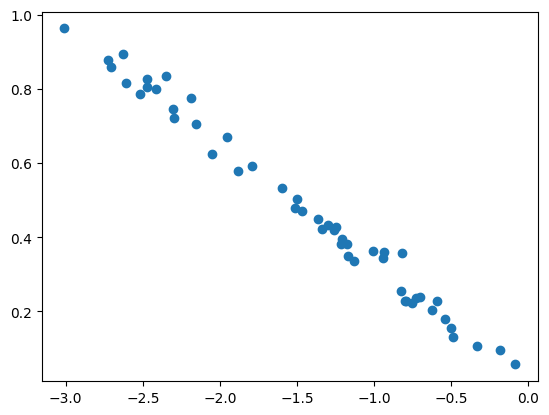

In [ ]:
plt.scatter( mycebmf.L[:,0],u)

In [ ]:
mycebmf.iter_once()
mycebmf.update_fitted_value()
import numpy as np
K=0
mycebmf.Y_fit 

5


tensor([[0.0559, 0.0082, 0.0884,  ..., 0.1922, 0.0349, 0.1039],
        [0.1444, 0.0168, 0.0991,  ..., 0.3755, 0.0937, 0.2111],
        [0.0087, 0.0042, 0.0104,  ..., 0.0316, 0.0063, 0.0144],
        ...,
        [0.1518, 0.1535, 0.0992,  ..., 0.3635, 0.3193, 0.2899],
        [0.0054, 0.0019, 0.0044,  ..., 0.0148, 0.0052, 0.0087],
        [0.0167, 0.0107, 0.0119,  ..., 0.0443, 0.0234, 0.0284]])

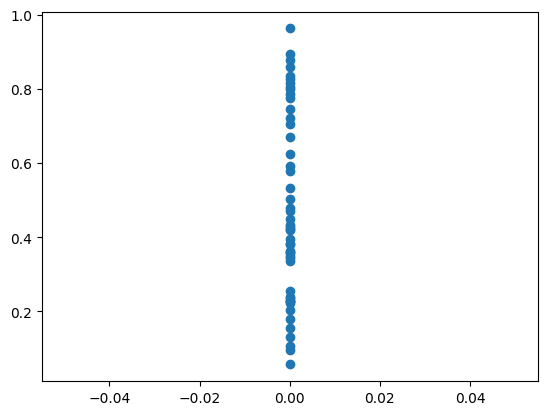

In [ ]:
plt.scatter( mycebmf.L[:,0],u)

5


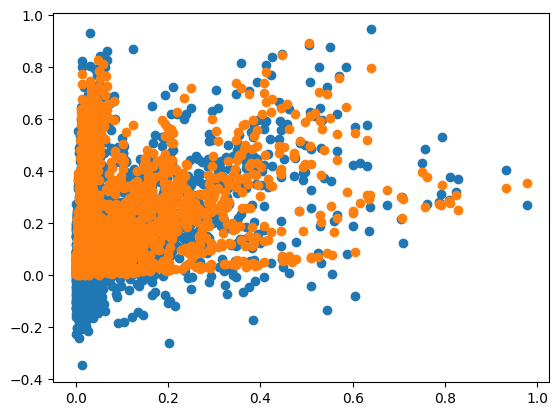

In [ ]:
mycebmf.iter_once()  
plt.scatter(mycebmf.Y_fit, noisy_matrix)
 
plt.scatter(mycebmf.Y_fit, rank_1_matrix)

In [ ]:
mycebmf.fit()

CEBMFResult(L=tensor([[ 5.8184],
        [18.8583],
        [15.7625],
        [ 1.1577],
        [14.3850],
        [ 9.1649],
        [ 8.0888],
        [ 3.6634],
        [13.6825],
        [15.4687],
        [ 4.9538],
        [ 3.0155],
        [11.7808],
        [ 3.1127],
        [15.4764],
        [ 7.5356],
        [12.2160],
        [17.0703],
        [ 7.8469],
        [ 8.5183],
        [ 2.0516],
        [ 7.0563],
        [12.8736],
        [11.1918],
        [16.3191],
        [14.4302],
        [14.7162],
        [ 4.9323],
        [ 5.1204],
        [ 0.7286],
        [ 5.8542],
        [16.4377],
        [ 7.5677],
        [ 4.3717],
        [ 7.3555],
        [ 9.4325],
        [ 9.9669],
        [ 3.8847],
        [ 8.3721],
        [ 7.7505],
        [ 9.3886],
        [16.9747],
        [ 6.2524],
        [ 4.7082],
        [ 5.1124],
        [ 7.2686],
        [ 4.5425],
        [15.1190],
        [ 3.3389],
        [13.5209]]), F=tensor([[0.0128],
        [0.004

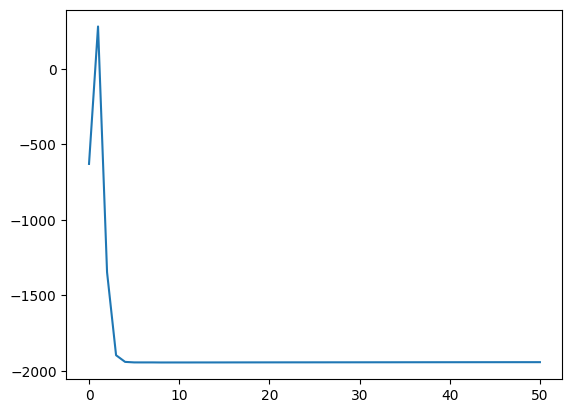

In [ ]:
plt.plot(mycebmf.obj)

tensor(0.0955, dtype=torch.float64)

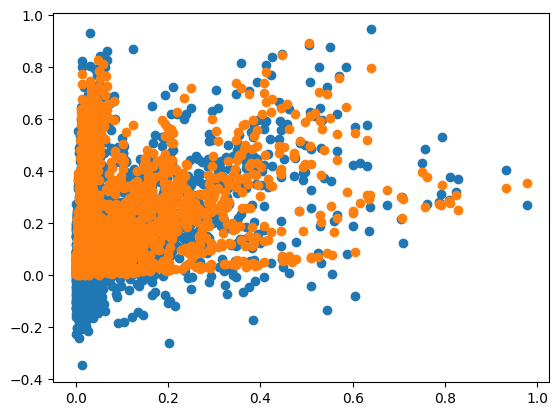

In [ ]:
plt.scatter(mycebmf.Y_fit, noisy_matrix)
 
plt.scatter(mycebmf.Y_fit, rank_1_matrix)
torch.sqrt(torch.mean(mycebmf.Y_fit- rank_1_matrix)**2)

In [ ]:
results =[]
for i in range(50):
    # Parameters
    n, p = 50, 40
    noise_std = 0.1

# (Optional) choose device
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ---- Data generation (PyTorch)
# Use float64 to mirror NumPy defaults
    u = torch.rand(n, dtype=torch.float64, device=device)          # length n
    v = torch.rand(p, dtype=torch.float64, device=device)          # length p

# Rank-1 matrix via outer product
    rank_1_matrix = torch.outer(u, v)                              # (n, p)

# Homoscedastic Gaussian noise
    noise = noise_std * torch.randn(n, p, dtype=torch.float64, device=device)

    noisy_matrix = rank_1_matrix + noise

 
# Add homoscedastic Gaussian noise (constant variance across the matrix)
    mycebmf=  cEBMF(data= noisy_matrix,prior_L="exp",
                    prior_F="exp") 
    mycebmf.initialize()
    mycebmf.fit()
    
    mycebmf.update_fitted_value()
    
    rr = torch.sqrt(torch.mean(mycebmf.Y_fit- rank_1_matrix)**2)
    results.append( rr)
 

5
2
5
2
5
2
5
5
2
5
4
4
2
5
4
5
2
5
4
5
5
5
2
5
2
5
3
5
4
3
3
2
2
5
5
5
4
5
2
5
5
5
5
5
4
5
5
4
3
3
5
4
3
5
3
5
5
2
5
5
5
5
4
2
5
4
3
2
5
3
5
4
3
5
2
5
5
2
5
5
5
5
2
5
5
5
5
2
5
2
5
5
2
5


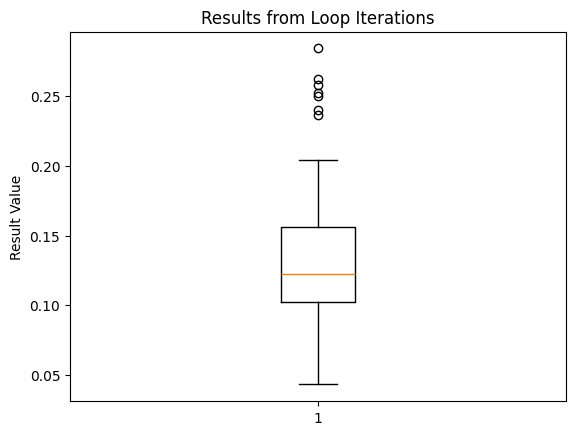

In [ ]:
plt.boxplot(results)
plt.title("Results from Loop Iterations")
plt.ylabel("Result Value")
plt.show()

In [ ]:
res= np.asarray(results)
np.mean(res )

np.float64(0.1389088285345857)

In [ ]:
mycebmf.obj

[527.9161987304688,
 -357.24554443359375,
 -778.427734375,
 -817.6709594726562,
 -821.3174438476562,
 -821.6087646484375,
 -821.67431640625,
 -821.6707153320312,
 -821.6539916992188,
 -821.635498046875,
 -821.6080322265625,
 -821.0786743164062,
 -821.0113525390625,
 -821.0027465820312,
 -820.9915161132812,
 -820.989501953125,
 -820.9876098632812,
 -820.9856567382812,
 -820.9930419921875,
 -820.9928588867188,
 -820.9840087890625,
 -820.9818725585938,
 -820.9810791015625,
 -820.98046875,
 -820.9791870117188,
 -820.9788818359375,
 -820.9849853515625,
 -820.9771118164062,
 -820.97509765625,
 -820.9747924804688,
 -820.9716186523438,
 -820.9735717773438,
 -820.97998046875,
 -820.979736328125,
 -820.9791870117188,
 -820.978515625,
 -820.97802734375,
 -820.9773559570312,
 -820.96826171875,
 -820.966552734375,
 -820.966796875,
 -820.9647827148438,
 -820.9647216796875,
 -820.9639282226562,
 -820.9647216796875,
 -820.970947265625,
 -820.9716796875,
 -820.9714965820312,
 -820.9701538085938,
 -820.

tensor(0.0966, dtype=torch.float64)

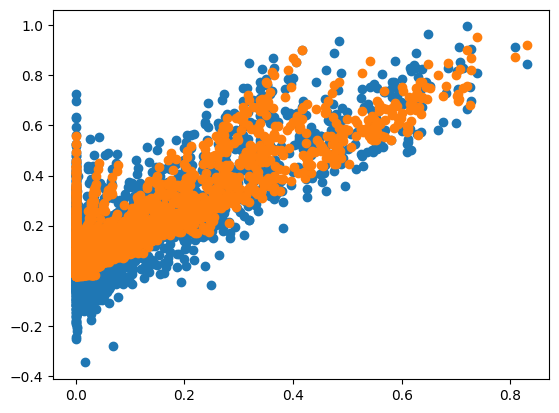

In [ ]:
mycebmf.update_fitted_value()
plt.scatter(mycebmf.Y_fit, noisy_matrix)
 
plt.scatter(mycebmf.Y_fit, rank_1_matrix)
torch.sqrt(torch.mean(mycebmf.Y_fit- rank_1_matrix)**2)